# Lab 5

In [1]:
from qiskit import QuantumCircuit, transpile
from pydantic import BaseModel, ValidationInfo
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler as PSampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Batch, Sampler
from numpy import pi
from math import atan, sqrt

## Zadanie 1
 Zaimplementuj algorytm gęstego kodowania w jednym z wybranych symulatorów


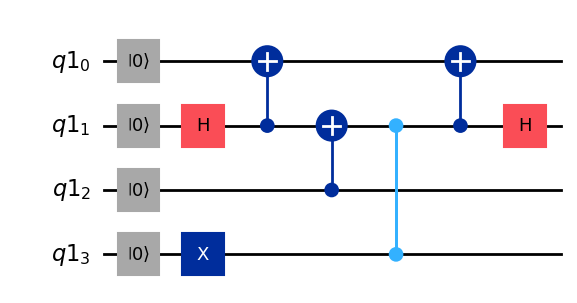

In [6]:
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

for i in range(4):
    qc.reset(qr[i])

q_state = [0, 1] # encode q2 and q3
for i, q in enumerate(q_state):
    if q == 1: qc.x(qr[i + 2])

# do poprawy na bazie filmiku doktor Rycerz

qc.h(qr[1])
qc.cx(qr[1], qr[0])
qc.cx(qr[2], qr[1])
qc.cz(qr[3], qr[1])
qc.cx(qr[1], qr[0])
qc.h(qr[1])

qc.draw('mpl')

In [7]:
state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

## Zadanie 2

Zaimplementuj algorytm teleportacji kwantowej w jednym z wybranych symulatorów

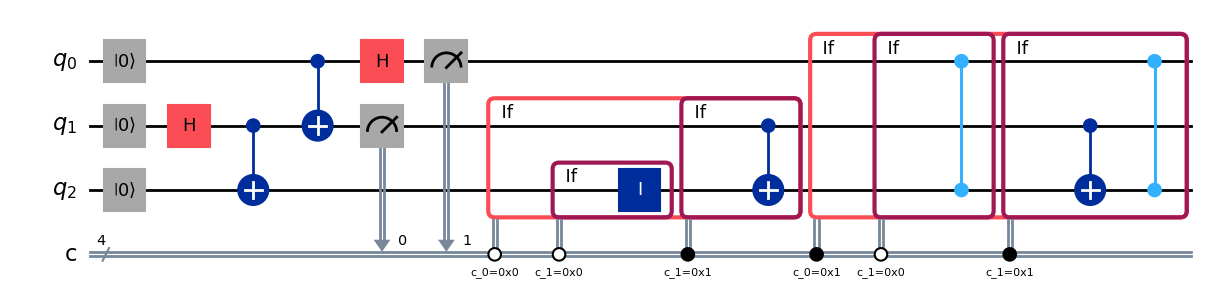

In [8]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.reset(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])

circuit.measure(qreg_q[1], creg_c[0])
circuit.measure(qreg_q[0], creg_c[1])

# tutaj wysyłamy gołębia z informacją o stanach - kanał klasyczny

with circuit.if_test((creg_c[0], 0)):
    with circuit.if_test((creg_c[1], 0)):
        circuit.id(qreg_q[2])
    with circuit.if_test((creg_c[1], 1)):
        circuit.cx(qreg_q[1], qreg_q[2])

with circuit.if_test((creg_c[0], 1)):
    with circuit.if_test((creg_c[1], 0)):
        circuit.cz(qreg_q[0], qreg_q[2])
    with circuit.if_test((creg_c[1], 1)):
        circuit.cx(qreg_q[1], qreg_q[2])
        circuit.cz(qreg_q[0], qreg_q[2])

circuit.draw('mpl')

In [9]:
state = Statevector.from_instruction(circuit)
state.draw('latex')

NotImplementedError: IfElseOp cannot be classically controlled through Instruction.c_if. Please nest it in an IfElseOp instead.

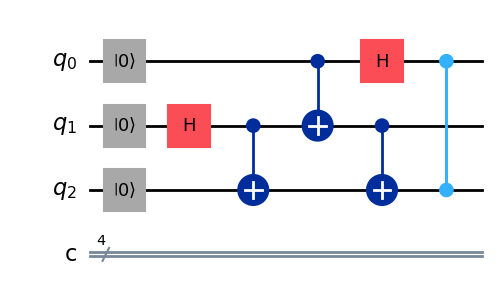

In [26]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.reset(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])

# circuit.measure(qreg_q[1], creg_c[0])
# circuit.measure(qreg_q[0], creg_c[1])

# tutaj wysyłamy gołębia z informacją o stanach - kanał klasyczny

# with circuit.if_test((creg_c[0], 0)):
#     with circuit.if_test((creg_c[1], 0)):
#         circuit.id(qreg_q[2])
#     with circuit.if_test((creg_c[1], 1)):
#         circuit.cx(qreg_q[1], qreg_q[2])

# with circuit.if_test((creg_c[0], 1)):
#     with circuit.if_test((creg_c[1], 0)):
#         circuit.cz(qreg_q[0], qreg_q[2])
#     with circuit.if_test((creg_c[1], 1)):
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])

circuit.draw('mpl')

In [27]:
state = Statevector.from_instruction(circuit)
state.draw('latex')

<IPython.core.display.Latex object>